# Notebook to visualize the data

In [1]:
# Import the librairies
from pandasql import sqldf
import pandas as pd
import matplotlib.pyplot as plt

from gen_fake_data import get_fake_data, get_fake_product
import process_data

1) Connection to the database

In [2]:
mydb = process_data.connect_database("e_commerce")
mycursor = mydb.cursor()

2. Show the tables

In [3]:
process_data.show_tables(mycursor)

('customers',)
('orders',)
('products',)


3. Get the tables

In [4]:
df_products = pd.read_sql("SELECT * FROM products", mydb)
df_customers = pd.read_sql("SELECT * FROM customers", mydb)
df_orders = pd.read_sql("SELECT * FROM orders", mydb)

C:\Users\wmok\AppData\Local\Temp\ipykernel_16776\2339937357.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql("SELECT * FROM products", mydb)
C:\Users\wmok\AppData\Local\Temp\ipykernel_16776\2339937357.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers = pd.read_sql("SELECT * FROM customers", mydb)
C:\Users\wmok\AppData\Local\Temp\ipykernel_16776\2339937357.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql("SELECT * FROM orders", mydb)


4. Perform analysis on products

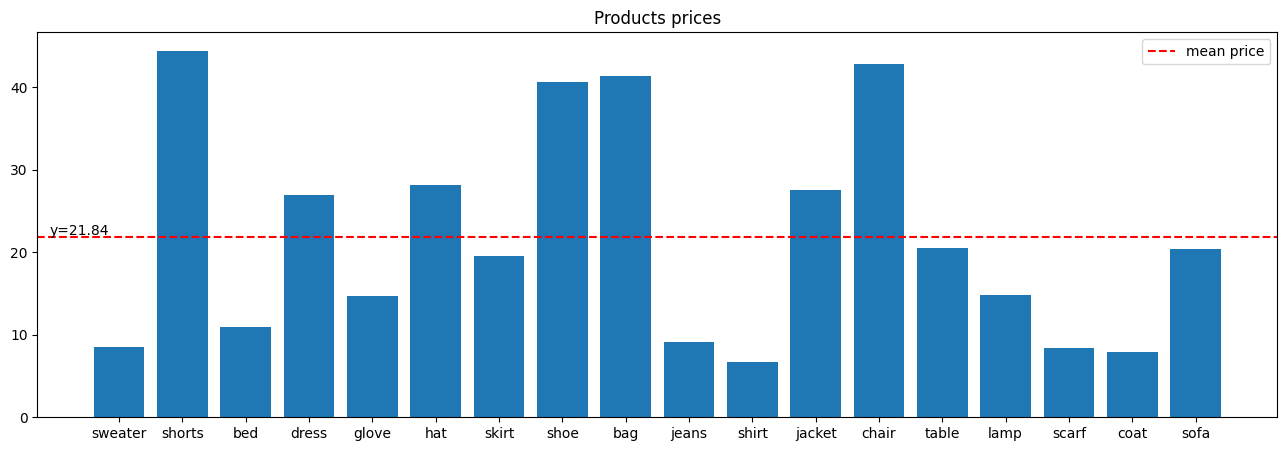

In [5]:
mean_price = df_products['price'].mean()

plt.figure(figsize=(16, 5))
plt.bar(df_products['name'], df_products['price'])
plt.axhline(y=mean_price, color='red', linestyle='dashed', label="mean price")
plt.annotate(f"y={round(mean_price, 2)}", xy=(-1.1, mean_price * 1.01), color='black')
plt.title("Products prices")
plt.legend()
plt.show()

In [6]:
df_orders

,order_id,order_date,quantity,bill,customer_id,product_id
0,1,2023-10-04,1,19.50,1,7
1,2,2023-10-04,1,20.51,2,14
2,3,2023-10-04,1,20.37,3,18
3,4,2023-10-04,5,39.50,4,17
4,5,2023-10-04,5,222.10,5,2


In [7]:
df_customers

,customer_id,name,address,email,phone_number,country
0,1,Dr Julian Evans,"1 McCarthy mountains, South Danieltown, E60 5SL",gregoryvictoria@example.org,+44909 8790299,Saint Lucia
1,2,Carl Goddard,"581 Sims forest, East Julia, DY37 4PB",gtaylor@example.net,+44(0)20 74960421,Gabon
2,3,Max Thomas,"Flat 84, Roberts springs, Daviston, W35 8QD",lindseywright@example.org,+441914960306,Lesotho
3,4,Gordon Buckley,"577 Alice way, New Paige, M4 2FW",caroleturner@example.net,01914960399,Cocos (Keeling) Islands
4,5,Joanne Williams-Jones,"23 Taylor crest, West Hilaryburgh, LN4 8NN",hazel53@example.org,+44(0)1614960028,Iceland


### SQLite Syntax
Website: https://www.sqlite.org/lang.html

In [8]:
q = """
SELECT df_customers.name AS customer_name, df_products.name AS product_name, bill, df_products.price AS unit_price, quantity
FROM df_orders, df_customers, df_products
WHERE df_orders.customer_id = df_customers.customer_id AND df_orders.product_id = df_products.product_id
"""

In [9]:
test = sqldf(q)
test

,customer_name,product_name,bill,unit_price,quantity
0,Dr Julian Evans,skirt,19.50,19.50,1
1,Carl Goddard,table,20.51,20.51,1
2,Max Thomas,sofa,20.37,20.37,1
3,Gordon Buckley,coat,39.50,7.90,5
4,Joanne Williams-Jones,shorts,222.10,44.42,5
